In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinasLE_Arb as ru

from scipy.interpolate import interp1d
from scipy.integrate import quad

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
# Resolución de ecuaciones del fondo
nodos, ell = 1, 0

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)#, Nptos=900, #1800 Rtol=1e-11, Atol=1e-12
                                                           #Rtol=1e-11, Atol=1e-12) # no escalada #1500 2500

Finding a profile with  0 nodes


Maxima precisión alcanzada 1.0886370791814817 radio 22.97399087827363
masa  -3.618701252391218 Uf  -0.15751295765566803

E(U(inf))  -0.06935612141541053
energía =  -0.16276920743826248 $\lambda = $ 0.27634223767763066

Checking normalización,  0.9999999999999999 1


checking  -1.0657312815176878 3.6187012436485935 0.010379126635215296 -0.16276920779957593

Plot shooting y extensión


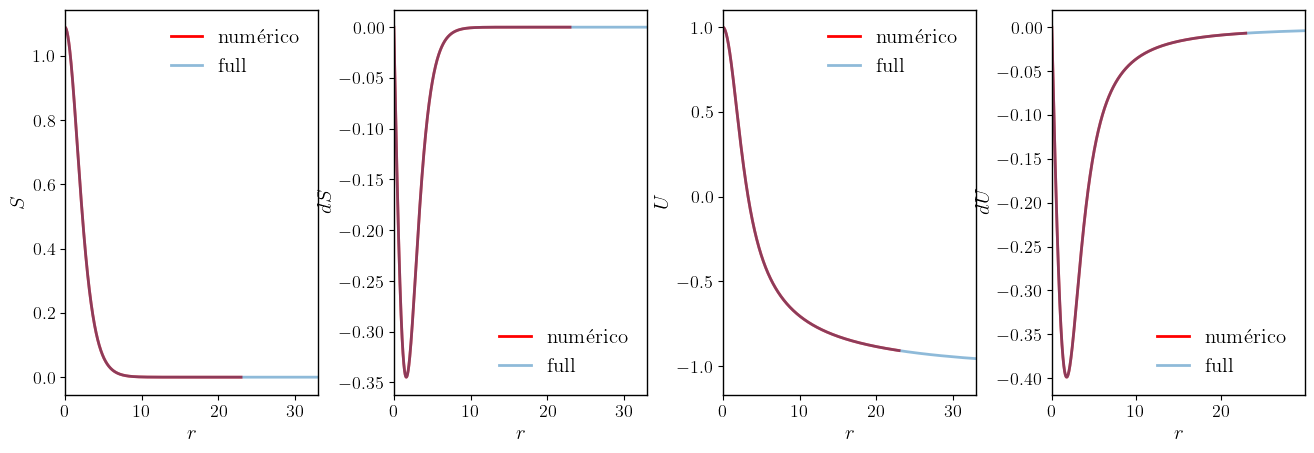

Checking normalización, 1.0000000009628522 1
Checking convergencia de la Energía U(inf), U(asint) -0.16269049027164786 -0.16276920743826248

Plot extensión normalizada y interpolación


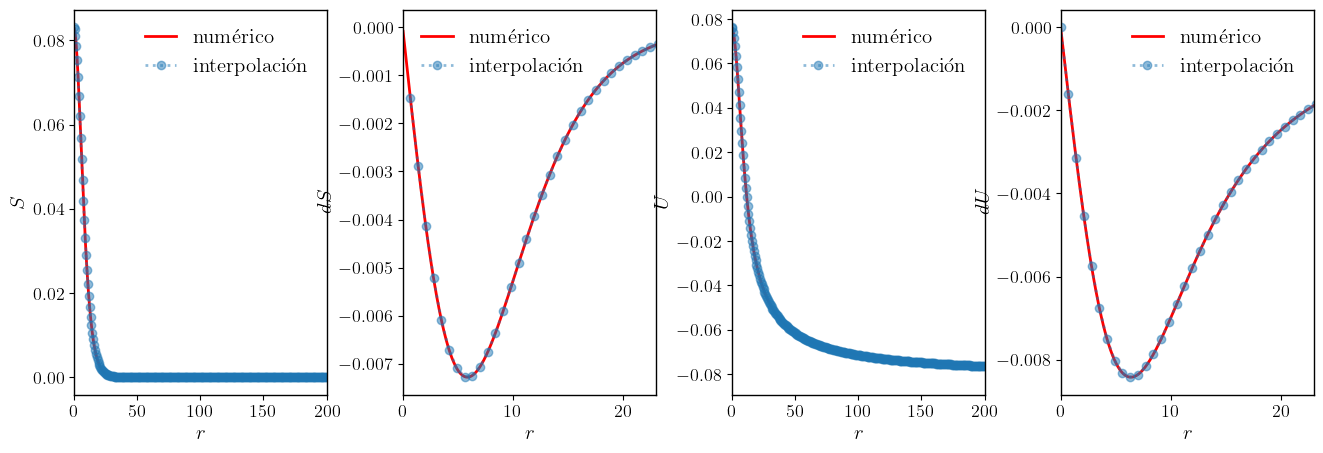

In [5]:
# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD[:-160], sD[:-160], 
                                                dsD[:-160], uD[:-160], duD[:-160], Ext, Np)

# graficando
yceros = np.zeros(len(cer0))
rad = np.linspace(rD[-1], rD[-1]+Ext, 1000)

print('')
print('Plot shooting y extensión')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(rD[:-1], sD[:-1], ls='-', c='red', label='numérico') 
#ax[0].plot(rad, sigm(rad, Ap, k), ls=':', c='red', label='extensión') 
ax[0].plot(rDnew, sDnew, ls='-', alpha=0.5, label='full') 
ax[0].plot(cer0, yceros, 'ko')

ax[0].set_xlim(rD[0], rD[-1]+10)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)
#ax[0].set_yscale('log')

ax[1].plot(rD[:-1], dsD[:-1], ls='-', c='red', label='numérico') 
#ax[1].plot(rad, dsigm(rad, Ap, k), ls=':', c='red',label='extensión') 
ax[1].plot(rDnew, dsDnew, ls='-', alpha=0.5, label='full') 

ax[1].set_xlim(rD[0], rD[-1]+10)
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(rD, uD, ls='-', c='red', label='numérico') 
#ax[2].plot(rad, Up(rad, AA, BB), ls=':', c='red',label='extensión')
ax[2].plot(rDnew, uDnew, ls='-', alpha=0.5, label='full') 

ax[2].set_xlim(rD[0], rD[-1]+10)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].plot(rD, duD, ls='-', c='red', label='numérico')  
#ax[3].plot(rad, dUp(rad, BB), ls=':',c='red', label='extensión') 
ax[3].plot(rDnew, duDnew, ls='-', alpha=0.5, label='full')

ax[3].set_xlim(rD[0], rD[-1]+7)
ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

plt.show()

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

# graficando
LL = 200*(nodos+1) #200
rad = np.linspace(0, rDnew[-1], 10000)

print('')
print('Plot extensión normalizada y interpolación')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3))

ax[0].plot(xN, sN, ls='-', c='red', label='numérico') 
ax[0].plot(rad, fsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[0].set_xlim(0, LL)
ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$S$')
ax[0].legend(frameon=False)

ax[1].plot(xN, dsN, ls='-', c='red', label='numérico') 
ax[1].plot(rad, fdsN(rad), ':o', alpha=0.5, label='interpolación') 

ax[1].set_xlim(0, rD[-1])
ax[1].set_xlabel(r'$r$')
ax[1].set_ylabel(r'$dS$')
ax[1].legend(frameon=False)


ax[2].plot(xN, uN, ls='-', c='red', label='numérico') 
ax[2].plot(rad, fuN(rad), ':o', alpha=0.5, label='interpolación') 

ax[2].set_xlim(0, LL)
ax[2].set_xlabel(r'$r$')
ax[2].set_ylabel(r'$U$')
ax[2].legend(frameon=False)
#ax[1].set_yscale('log')

ax[3].set_xlim(0, rD[-1])
ax[3].plot(xN, duN, ls='-', c='red', label='numérico')  
ax[3].plot(rad, fduN(rad), ':o', alpha=0.5, label='interpolación') 

ax[3].set_xlabel(r'$r$')
ax[3].set_ylabel(r'$dU$')
ax[3].legend(frameon=False)

In [7]:
print(fsN(0))

0.0831338057415392


In [16]:
# salvando x, sigma, u, En
# enVec = [en]*len(xN)
# temp = np.array([xN, sN, uN, enVec]).T
# np.savetxt('BackgroundData_ell_0.dat', temp)

### Estudiando autovalores

In [6]:
# Estudiando convergencia de autovalores con rmax fijo 
# checking==True:
datFunc = [fsN, fuN]
rMax = 200*(nodos+1)
Nptos = int(3*rMax/4)

autDat = 10
# [int(Nptos/4), int(Nptos/3), int(Nptos/2), int(Nptos), int(Nptos*2), int(Nptos*3)]
NptosDat = np.arange(30, 300, 20)
Jval = range(0, 9)

datos = [[None]*len(Jval) for _ in range(len(NptosDat))]  # cada fila es un valor de Nptos y columna J
for J in Jval:
    k=0
    for i in NptosDat:
        util = [ell, J, i, rMax]
        lEnigF1, _, VF1, _ = ru.espectro(datFunc, util)

        # autovalores reales
        jj = np.real(lEnigF1)!=0
        autoval = lEnigF1[jj]
        #print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, i), autoval)

        # Organizando de menor a mayor los autovalores
        indF = ru.menor(lEnigF1).astype(int)
        AutovaOrg = lEnigF1[indF]
        datos[k][J] = AutovaOrg[:autDat]
        k += 1

In [7]:
# Estudiando convergencia de autovalores con rmax fijo 
# checking==True:
datFunc = [fsN, fuN]
rMax = 200*(nodos+1)
Nptos = int(3*rMax/4)

autDat = 10
DatrMax = np.arange(40, 300, 20)
Jval = range(0, 9)

datos2 = [[None]*len(Jval) for _ in range(len(DatrMax))]  # cada fila es un valor de Nptos y columna J
for J in Jval:
    k=0
    for i in DatrMax:
        util = [ell, J, Nptos, i]
        lEnigF1, _, VF1, _ = ru.espectro(datFunc, util)

        # autovalores reales
        jj = np.real(lEnigF1)!=0
        autoval = lEnigF1[jj]
        #print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, i), autoval)

        # Organizando de menor a mayor los autovalores
        indF = ru.menor(lEnigF1).astype(int)
        AutovaOrg = lEnigF1[indF]
        datos2[k][J] = AutovaOrg[:autDat]
        k += 1

In [8]:
# calculando diferencia relativa con respecto a N=int(Nptos)
compN = 6  # valor de Nptos con el que se desea comparar
# [J1, J2, ..., Jval] -> J=[A1, A2, ..., autDat] -> A=[N1, N2, NptosDat]
# [[[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], 
#  [[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], ..., 
# Jval]
dat1 =  [[[None]*len(NptosDat) for __ in range(autDat)] for _ in range(len(Jval))]
for J in range(len(Jval)):  
    for i in range(autDat):
        for k in range(len(NptosDat)):
            if k==compN:
                continue
            temp = np.abs(np.abs(datos[k][J][i]) - np.abs(datos[compN][J][i]))/np.abs(datos[compN][J][i])
            dat1[J][i][k] = temp

In [9]:
# calculando diferencia relativa con respecto a rmax
compRmax = 8  # valor de Nptos con el que se desea comparar
# [J1, J2, ..., Jval] -> J=[A1, A2, ..., autDat] -> A=[N1, N2, NptosDat]
# [[[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], 
#  [[N1, N2, ..., NptosDat], [N1, N2, ..., NptosDat], ..., autDat], ..., 
# Jval]
dat2 =  [[[None]*len(DatrMax) for __ in range(autDat)] for _ in range(len(Jval))]
for J in range(len(Jval)):  
    for i in range(autDat):
        for k in range(len(DatrMax)):
            if k==compRmax:
                continue
            temp = np.abs(np.abs(datos[k][J][i]) - np.abs(datos[compRmax][J][i]))/np.abs(datos[compRmax][J][i])
            dat2[J][i][k] = temp

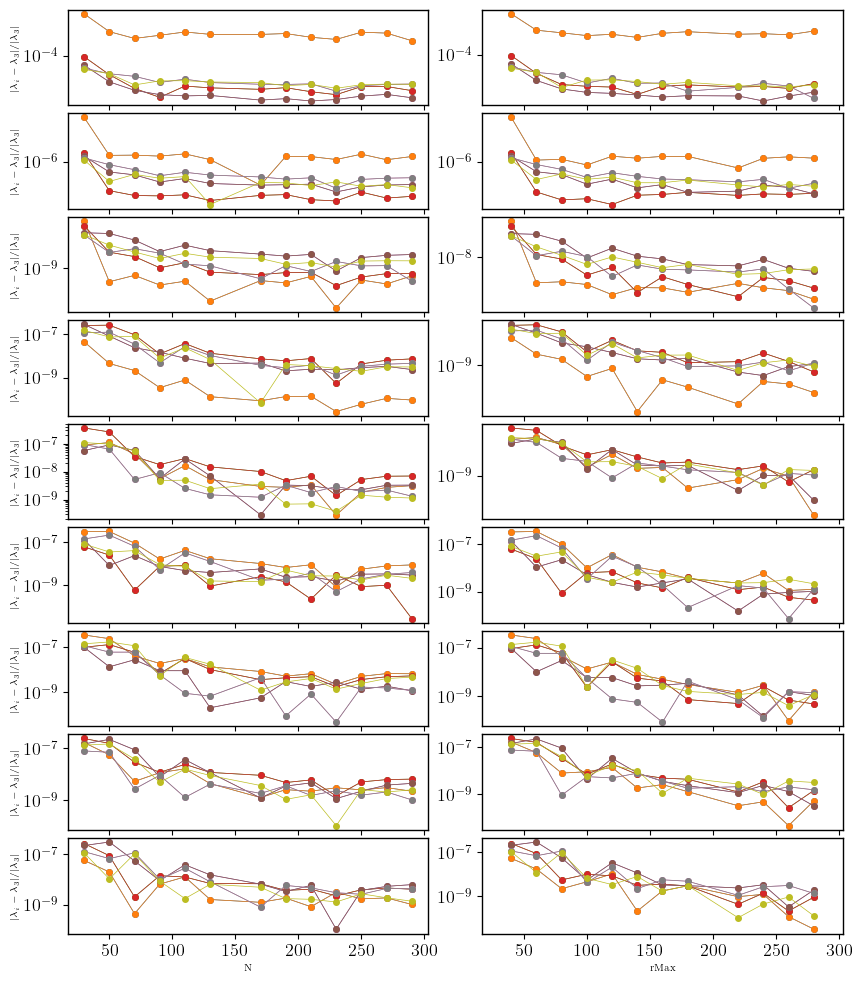

In [11]:
fig, ax = plt.subplots(nrows=len(Jval), ncols=2, figsize=(10, 12.),
                       sharex=True, sharey=False,
                       gridspec_kw=dict(hspace=0.08, wspace=.15))

for J in range(len(Jval)):
    for i in range(autDat-1):
        temp = np.array(dat1[J][i])
        ind = temp!=None
        ydat = temp[ind]
        xdat = NptosDat[ind]
        ax[J][0].plot(xdat, ydat, ls='-', lw=0.5, marker='o', markersize=4)
        ax[J][0].set_yscale('log')
        
        #ax[J][0].set_ylim(1e-14, 300)
        ax[J][0].set_ylabel(r'$|\lambda_{i}-\lambda_{3}|/|\lambda_{3}|$', fontsize=7)

        #ax[J][0].text(350, 1e-04, s=r'J=%d'%J)

    for i in range(autDat-1):
        temp = np.array(dat2[J][i])
        ind = temp!=None
        ydat = temp[ind]
        xdat = DatrMax[ind]
        ax[J][1].plot(xdat, ydat, ls='-', lw=0.5, marker='o', markersize=4)
        ax[J][1].set_yscale('log')
        
        #ax[J][0].set_ylim(1e-14, 300)
        #ax[J][1].set_ylabel(r'$|\lambda_{i}-\lambda_{3}|/|\lambda_{3}|$', fontsize=7)

        #ax[J][0].text(350, 1e-04, s=r'J=%d'%J)
    
    ax[-1][0].set_xlabel('N', fontsize=7)
    ax[-1][1].set_xlabel('rMax', fontsize=7)


In [ ]:
### La convergencia es bueno para 
# rMax = 200*(nodos+1)
# Nptos = int(3*rMax/4)
# así que lo calculamos usando esas condiciones

In [12]:
# Calculando los autovalores (Espectro)
Jval = range(0, 9)  # momento angular de la perturbación 
autDat = 10

rMax = 200*(nodos+1)
Nptos = int(3*rMax/4)

datFunc = [fsN, fuN]

datos3 = []  # cada fila es un valor de Nptos y columna J
for J in Jval:
    util = [ell, J, Nptos, rMax]
    lEnigF1, _, VF1, _ = ru.espectro(datFunc, util)

    # autovalores reales
    jj = np.real(lEnigF1)!=0
    autoval = lEnigF1[jj]
    print('Autovalores con part. Real para J=%d, Npt.=%d -> '%(J, Nptos), autoval)

    # Organizando de menor a mayor los autovalores
    indF = ru.menor(lEnigF1).astype(int)
    AutovaOrg = lEnigF1[indF]
    datos3.append(AutovaOrg[:autDat])

Autovalores con part. Real para J=0, Npt.=150 ->  []
Autovalores con part. Real para J=1, Npt.=150 ->  []
Autovalores con part. Real para J=2, Npt.=150 ->  []
Autovalores con part. Real para J=3, Npt.=150 ->  []
Autovalores con part. Real para J=4, Npt.=150 ->  []
Autovalores con part. Real para J=5, Npt.=150 ->  []
Autovalores con part. Real para J=6, Npt.=150 ->  []
Autovalores con part. Real para J=7, Npt.=150 ->  []
Autovalores con part. Real para J=8, Npt.=150 ->  []


In [13]:
k = 0
for J in Jval:
    print('Autovalores para J -> %d'%J)
    print('') 
    print(datos3[k])
    print('')
    k += 1

Autovalores para J -> 0

[-0.-4.32132186e-06j  0.+4.32132186e-06j  0.+3.41255777e-02j
 -0.-3.41255777e-02j  0.+6.03019820e-02j -0.-6.03019820e-02j
 -0.-6.88247640e-02j  0.+6.88247640e-02j -0.-7.30239028e-02j
  0.+7.30239028e-02j]

Autovalores para J -> 1

[ 0.+0.0005j     -0.-0.0005j      0.+0.05555078j -0.-0.05555078j
  0.+0.06676208j -0.-0.06676208j  0.+0.07193577j -0.-0.07193577j
 -0.-0.07478786j  0.+0.07478786j]

Autovalores para J -> 2

[-0.-0.05285868j  0.+0.05285868j  0.+0.0656427j  -0.-0.0656427j
  0.+0.07136165j -0.-0.07136165j -0.-0.07444323j  0.+0.07444323j
 -0.-0.0765101j   0.+0.0765101j ]

Autovalores para J -> 3

[ 0.+0.06571493j -0.-0.06571493j -0.-0.07135829j  0.+0.07135829j
  0.+0.07442765j -0.-0.07442765j -0.-0.07642957j  0.+0.07642957j
  0.+0.07854181j -0.-0.07854181j]

Autovalores para J -> 4

[ 0.+0.07138332j -0.-0.07138332j -0.-0.07444013j  0.+0.07444013j
 -0.-0.07637611j  0.+0.07637611j  0.+0.07828611j -0.-0.07828611j
  0.+0.08077714j -0.-0.08077714j]

Autovalore

In [15]:
datos3[2][3]

(-0-0.0656426959263339j)